In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

# Remove constant features
---

In [8]:
# load the data
data = pd.read_csv('datasets/dataset_1.csv')
data.shape

(50000, 301)

In [9]:
# create test train split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 300), (15000, 300))

## Using VarianceThreshold from sklearn

In [10]:
sel = VarianceThreshold(threshold=0)
sel.fit(X_train) # fit finds the features with 0 variance

VarianceThreshold(threshold=0)

In [11]:
# get_support is a boolean that indicates which features are retained
sum(sel.get_support())

266

In [12]:
# get the constant features that can be removed
constant = X_train.columns[~sel.get_support()]
len(constant)

34

In [13]:
constant

Index(['var_23', 'var_33', 'var_44', 'var_61', 'var_80', 'var_81', 'var_87',
       'var_89', 'var_92', 'var_97', 'var_99', 'var_112', 'var_113', 'var_120',
       'var_122', 'var_127', 'var_135', 'var_158', 'var_167', 'var_170',
       'var_171', 'var_178', 'var_180', 'var_182', 'var_195', 'var_196',
       'var_201', 'var_212', 'var_215', 'var_225', 'var_227', 'var_248',
       'var_294', 'var_297'],
      dtype='object')

In [14]:
# double check using np.unique()
for col in constant:
    print(col, X_train[col].unique())

var_23 [0]
var_33 [0]
var_44 [0]
var_61 [0]
var_80 [0]
var_81 [0]
var_87 [0]
var_89 [0.]
var_92 [0]
var_97 [0]
var_99 [0]
var_112 [0]
var_113 [0]
var_120 [0]
var_122 [0]
var_127 [0]
var_135 [0]
var_158 [0]
var_167 [0]
var_170 [0]
var_171 [0]
var_178 [0.]
var_180 [0.]
var_182 [0]
var_195 [0]
var_196 [0]
var_201 [0]
var_212 [0]
var_215 [0]
var_225 [0]
var_227 [0.]
var_248 [0]
var_294 [0]
var_297 [0]


In [15]:
# get the non-constant features
features = X_train.columns[sel.get_support()]

In [16]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 266), (15000, 266))

In [17]:
# turn back into dataframe (transform returns numpy array)
X_train = pd.DataFrame(X_train, columns=features)
X_train.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_289,var_290,var_291,var_292,var_293,var_295,var_296,var_298,var_299,var_300
0,0.0,0.0,0.0,2.79,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,2.97,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,2.79,85435.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,5.70,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Manual method for numeric values only

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [19]:
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

len(constant_features)

34

In [20]:
X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 266), (15000, 266))

## Manual method that also works with categorical variables

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [22]:
# cast to object to simulate categorical variables
X_train = X_train.astype('O')
X_train.dtypes

var_1      object
var_2      object
var_3      object
var_4      object
var_5      object
            ...  
var_296    object
var_297    object
var_298    object
var_299    object
var_300    object
Length: 300, dtype: object

In [25]:
# note nunique ignores missing values - if the variable has missing values use dropna=False
constant_features = [
    feat for feat in X_train.columns if X_train[feat].nunique() == 1
]

len(constant_features)

0

In [26]:
X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 266), (15000, 266))

# Remove quasi-constant features

In [27]:
# load the data
data = pd.read_csv('datasets/dataset_1.csv')
data.shape

(50000, 301)

In [28]:
# create test train split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [29]:
# create an empty list
quasi_constant_feat = []

# iterate over every feature
for feature in X_train.columns:

    # find the predominant value, that is the value that is shared
    # by most observations
    predominant = (X_train[feature].value_counts() / np.float(
        len(X_train))).sort_values(ascending=False).values[0]

    # evaluate the predominant feature
    if predominant > 0.998:
        
        # if yes, add the variable to the list
        quasi_constant_feat.append(feature)

len(quasi_constant_feat)

142

In [30]:
quasi_constant_feat[2]

'var_3'

In [31]:
X_train['var_3'].value_counts() / np.float(len(X_train))

0.0000         0.999629
35685.9459     0.000029
3583.3941      0.000029
15028.0560     0.000029
52105.7901     0.000029
10281.6000     0.000029
86718.0000     0.000029
207901.3365    0.000029
25905.4866     0.000029
5209.9500      0.000029
2641.0164      0.000029
12542.3100     0.000029
861.0900       0.000029
27.3000        0.000029
Name: var_3, dtype: float64

In [32]:
# drop the quasi-constant features:

X_train.drop(labels=quasi_constant_feat, axis=1, inplace=True)
X_test.drop(labels=quasi_constant_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 158), (15000, 158))

# Remove duplicate features

In [33]:
# load the data
data = pd.read_csv('datasets/dataset_1.csv')
data.shape

(50000, 301)

In [34]:
# create test train split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [35]:
# remove constant and quasi-constant features first

# create an empty list
quasi_constant_feat = []

# iterate over every feature
for feature in X_train.columns:

    # find the predominant value, that is the value that is shared
    # by most observations
    predominant = (X_train[feature].value_counts() / np.float(
        len(X_train))).sort_values(ascending=False).values[0]

    # evaluate predominant features
    if predominant > 0.998:
        quasi_constant_feat.append(feature)

len(quasi_constant_feat)

142

In [36]:
# drop the quasi-constant features:

X_train.drop(labels=quasi_constant_feat, axis=1, inplace=True)
X_test.drop(labels=quasi_constant_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 158), (15000, 158))

In [37]:
# check for duplicated features in the training set

# create an empty dictionary, where we will store the groups of duplicates
duplicated_feat_pairs = {}

# create an empty list to collect features that were found to be duplicated
_duplicated_feat = []

# iterate over every feature in our dataset:
for i in range(0, len(X_train.columns)):
    
    # this bit helps me understand where the loop is at:
    if i % 10 == 0:  
        print(i)
    
    # choose 1 feature:
    feat_1 = X_train.columns[i]
    
    # check if this feature has already been identified
    # as a duplicate of another one. If it was, it should be stored in
    # our _duplicated_feat list.
    
    # If this feature was already identified as a duplicate, we skip it, if
    # it has not yet been identified as a duplicate, then we proceed:
    if feat_1 not in _duplicated_feat:
    
        # create an empty list as an entry for this feature in the dictionary:
        duplicated_feat_pairs[feat_1] = []

        # now, iterate over the remaining features of the dataset:
        for feat_2 in X_train.columns[i + 1:]:

            # check if this second feature is identical to the first one
            if X_train[feat_1].equals(X_train[feat_2]):

                # if it is identical, append it to the list in the dictionary
                duplicated_feat_pairs[feat_1].append(feat_2)
                
                # and append it to our monitor list for duplicated variables
                _duplicated_feat.append(feat_2)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150


In [38]:
len(_duplicated_feat)

6

In [39]:
_duplicated_feat

['var_148', 'var_199', 'var_296', 'var_250', 'var_232', 'var_269']

In [40]:
duplicated_feat_pairs

{'var_4': [],
 'var_5': [],
 'var_8': [],
 'var_13': [],
 'var_15': [],
 'var_17': [],
 'var_18': [],
 'var_19': [],
 'var_21': [],
 'var_22': [],
 'var_25': [],
 'var_26': [],
 'var_27': [],
 'var_29': [],
 'var_30': [],
 'var_31': [],
 'var_35': [],
 'var_37': ['var_148'],
 'var_38': [],
 'var_41': [],
 'var_46': [],
 'var_47': [],
 'var_49': [],
 'var_50': [],
 'var_51': [],
 'var_52': [],
 'var_54': [],
 'var_55': [],
 'var_57': [],
 'var_58': [],
 'var_62': [],
 'var_63': [],
 'var_64': [],
 'var_68': [],
 'var_70': [],
 'var_74': [],
 'var_75': [],
 'var_76': [],
 'var_79': [],
 'var_82': [],
 'var_83': [],
 'var_84': ['var_199'],
 'var_85': [],
 'var_86': [],
 'var_88': [],
 'var_91': [],
 'var_93': [],
 'var_94': [],
 'var_96': [],
 'var_100': [],
 'var_101': [],
 'var_103': [],
 'var_105': [],
 'var_107': [],
 'var_108': [],
 'var_109': [],
 'var_110': [],
 'var_114': [],
 'var_117': [],
 'var_118': [],
 'var_119': [],
 'var_121': [],
 'var_123': [],
 'var_128': [],
 'var_131'

In [41]:
print(len(duplicated_feat_pairs.keys()))

152


In [42]:
# remove the duplicates, retain only the keys of the dictionary

X_train = X_train[duplicated_feat_pairs.keys()]
X_test = X_test[duplicated_feat_pairs.keys()]

X_train.shape, X_test.shape

((35000, 152), (15000, 152))

# Correlation
---

Any statistical relationship or association between two random variables.   
Typically linear relationship.  
Good variables are highly correlated with the target.   
Correlated variables are redundant and don't provide additional value.   
Good features are highly correlated with the target but are uncorrelated with each other.

## Pearson's correlation coefficient   
Sum((X1-X1mean)\*(Xn-Xn_mean)) / VarX1\*VarXn   
Value vary's between -1 and 1   
1 is highly correlated   
-1 is highly anti-correlated  

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [4]:
# load dataset
data = pd.read_csv('datasets/dataset_2.csv', nrows=50000)
data.shape

(50000, 109)

In [5]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [16]:
# create test train split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

## Correlation heatmap

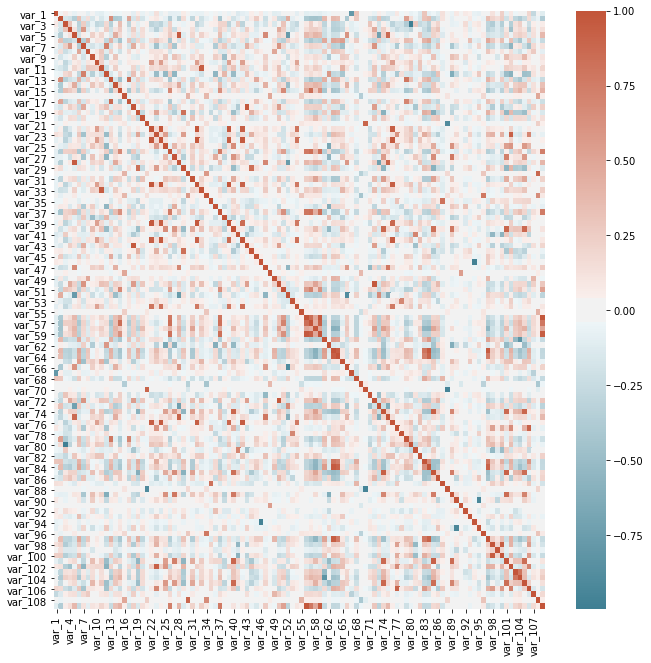

In [7]:
# the default correlation method of pandas.corr is pearson
corrmat = X_train.corr(method='pearson')

# we can make a heatmap with the package seaborn
# and customise the colours of searborn's heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# some more parameters for the figure
fig, ax = plt.subplots()
fig.set_size_inches(11,11)

# and now plot the correlation matrix
sns.heatmap(corrmat, cmap=cmap)

In the plot above, the dark orange squares correspond to highly correlated features (>0.8). Darker blue squares corresponds to negatively correlated features (<-0.8).   

The diagonal represents the correlation of a feature with itself, therefore the value is 1.   

We can see that there are a few features that are highly correlated.    

## Correlation scatterplots

In [9]:
# compare var_5 to other variable
c = 0

# iterate over each correlation value for var_5:
for i in corrmat.loc['var_5']:
    
    # if highly correlated
    if i>0.8:
        
        # print the variable name and the correlation coefficient
        print(corrmat.columns[c], i)
        
    c = c +1

var_5 1.0
var_28 0.9536721652385074
var_75 0.8616179292025175


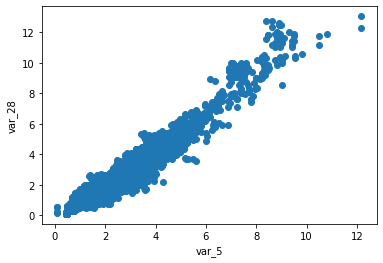

In [10]:
plt.scatter(X_train['var_5'], X_train['var_28'])
plt.ylabel('var_28')
plt.xlabel('var_5')
plt.show()

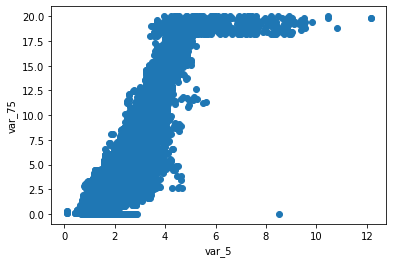

In [11]:
plt.scatter(X_train['var_5'], X_train['var_75'])
plt.ylabel('var_75')
plt.xlabel('var_5')
plt.show()

## Remove correlated features

### Brute force approach

In [12]:
def correlation(dataset, threshold):
    # create a set to store the names of correlated columns
    col_corr = set()
    
    # create the correlation matrix
    corr_matrix = dataset.corr()
    
    # for each feature in the dataset (columns of the correlation matrix)
    for i in range(len(corr_matrix.columns)):
        # check with other features
        for j in range(i):
            # if the correlation is higher than a certain threshold
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                # get the name of the correlated feature
                colname = corr_matrix.columns[i]
                
                # and add it to our correlated set
                col_corr.add(colname)
                
    return col_corr

In [13]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

36

In [17]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 72), (15000, 72))

### Model importance approach

In [18]:
# create test train split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [19]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,var_80,var_3,0.994923
1,var_3,var_80,0.994923
2,var_22,var_32,0.990431
3,var_32,var_22,0.990431
4,var_109,var_56,0.987777


In [20]:
# find groups of correlated features
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:
        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 26 correlated groups
out of 108 total features


In [21]:
group = correlated_groups[1]
group

,feature1,feature2,corr
2,var_22,var_32,0.990431
6,var_22,var_24,0.981341
15,var_22,var_39,0.974461
45,var_22,var_76,0.931911
59,var_22,var_42,0.919106


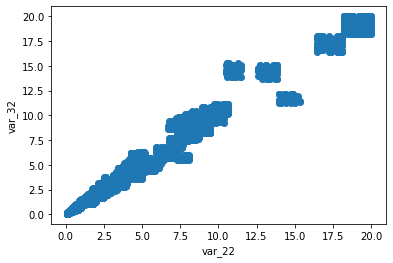

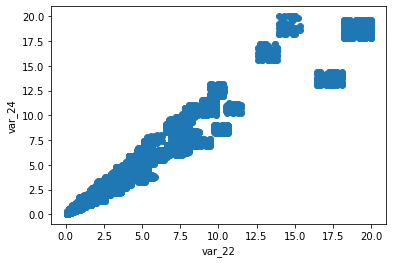

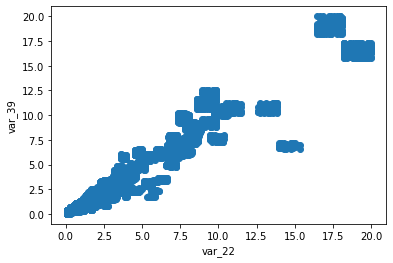

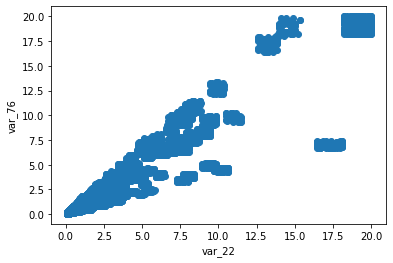

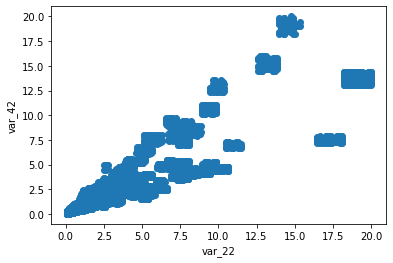

In [24]:
for feature in group['feature2']:
    plt.scatter(X_train['var_22'], X_train[feature])
    plt.xlabel('var_22')
    plt.ylabel(feature)
    plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier

# add all features of the group to a list
features = list(group['feature2'].unique())+['var_22']

# train a random forest 
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=39)

In [23]:
# get the feature importance attributed by the 
# random forest model (more on this in coming lectures)

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# sort features by importance, most important first
importance.sort_values(by='importance', ascending=False)

,feature,importance
2,var_39,0.193758
3,var_76,0.181767
5,var_22,0.177793
4,var_42,0.154643
1,var_24,0.152343
0,var_32,0.139697


# Statistical measures
---

## Mutual Information
Amount of information gained about one random variable through observing the other random variable.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile

### Classification

In [28]:
# load dataset
data = pd.read_csv('datasets/dataset_2.csv')
data.shape

(50000, 109)

In [29]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [30]:
# calculate the mutual information between the variables and the target

# the smaller the value of the mi, the less information we can infer from
# the feature about the target

mi = mutual_info_classif(X_train, y_train)
mi

array([0.00000000e+00, 3.45228407e-03, 0.00000000e+00, 1.29212097e-03,
       2.52722938e-04, 4.94099638e-03, 4.89970777e-03, 2.73733979e-03,
       0.00000000e+00, 0.00000000e+00, 8.96028301e-04, 8.12432409e-04,
       9.21413934e-04, 4.97441269e-03, 0.00000000e+00, 1.56560009e-02,
       0.00000000e+00, 0.00000000e+00, 1.44767963e-04, 0.00000000e+00,
       3.97314147e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.28201311e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.58056201e-03, 1.51381008e-03, 0.00000000e+00, 0.00000000e+00,
       4.92153185e-03, 1.67474934e-02, 0.00000000e+00, 2.13881231e-03,
       4.28043982e-04, 1.88053224e-03, 4.56972887e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.04630448e-06, 2.92647829e-03,
       1.95590351e-03, 2.04931977e-03, 0.00000000e+00, 2.44590695e-03,
       0.00000000e+00, 2.86040239e-04, 0.00000000e+00, 2.61186089e-03,
       0.00000000e+00, 3.27833395e-03, 4.07370396e-02, 1.54694222e-03,
      

Text(0, 0.5, 'Mutual Information')

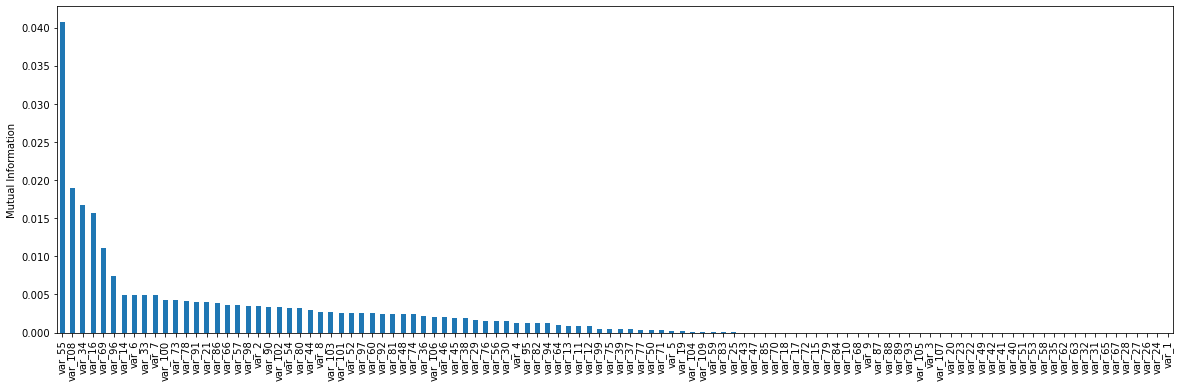

In [31]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [32]:
# here we will select the top 10 features
# based on their mutual information value

# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index(['var_6', 'var_7', 'var_14', 'var_16', 'var_34', 'var_55', 'var_69',
       'var_91', 'var_96', 'var_108'],
      dtype='object')

In [33]:
# remove the rest of the features:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

### Regression

In [34]:
# load dataset
data = pd.read_csv('datasets/daily_weather.csv')
data.shape

(1095, 11)

In [36]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['air_temp_9am'], axis=1),
    data['air_temp_9am'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((766, 10), (329, 10))

In [39]:
# fill missing values
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

Text(0, 0.5, 'Mutual Information')

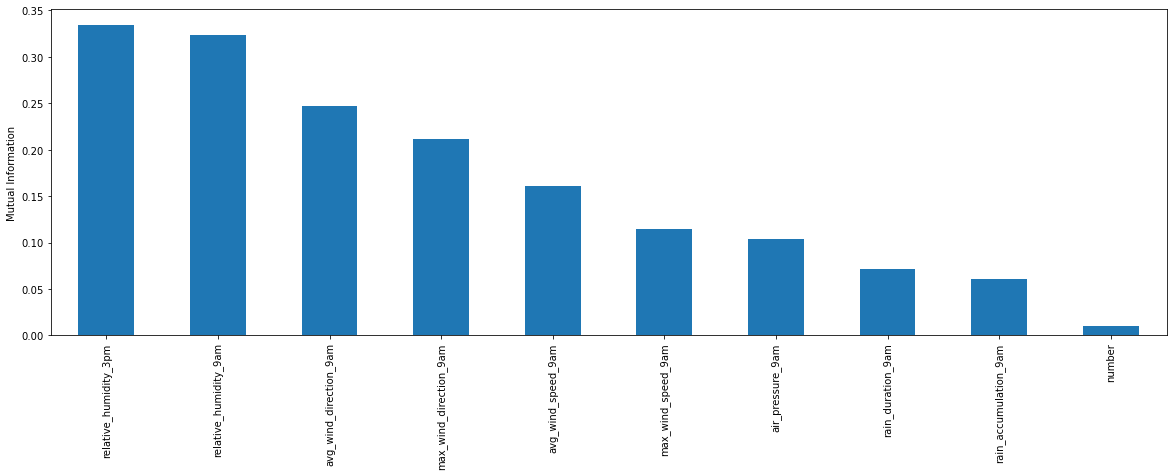

In [40]:
# determine the mutual information
mi = mutual_info_regression(X_train, y_train)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.ylabel('Mutual Information')

In [41]:
# Select the features in the top percentile
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train, y_train)

# display the features
X_train.columns[sel_.get_support()]

Index(['relative_humidity_3pm'], dtype='object')

In [42]:
# to remove the rest of the features:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

X_train

array([[48.98      ],
       [ 8.77073238],
       [21.5984327 ],
       [68.05      ],
       [79.38      ],
       [11.10544045],
       [56.6       ],
       [27.66      ],
       [23.92037235],
       [15.84193979],
       [11.13959641],
       [16.46168535],
       [21.38565673],
       [17.78      ],
       [55.52      ],
       [88.35      ],
       [52.38      ],
       [14.41557484],
       [46.66      ],
       [26.94      ],
       [45.61      ],
       [19.56875014],
       [70.32      ],
       [47.93      ],
       [14.05      ],
       [ 9.13      ],
       [17.6       ],
       [19.58      ],
       [17.82      ],
       [15.37      ],
       [17.4       ],
       [17.08277678],
       [57.14      ],
       [21.40006281],
       [64.07      ],
       [10.89967875],
       [73.65      ],
       [64.71      ],
       [15.68484501],
       [23.8       ],
       [14.4090867 ],
       [39.52      ],
       [30.02      ],
       [54.2       ],
       [15.22690772],
       [54

## Chi-square
Suited for categorical variables

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# to determine the chi2 value
from sklearn.feature_selection import chi2

# to select the features
from sklearn.feature_selection import SelectKBest

In [52]:
# load dataset
data = pd.read_csv('datasets/titanic.csv')
data.shape

(1306, 9)

In [53]:
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,female,29.0000,0,0,211.3375,B5,S
1,1,1,male,0.9167,1,2,151.5500,C22,S
2,1,0,female,2.0000,1,2,151.5500,C22,S
3,1,0,male,30.0000,1,2,151.5500,C22,S
4,1,0,female,25.0000,1,2,151.5500,C22,S


In [54]:
# the categorical variables in the titanic are pclass, sex and embarked
# first encode the labels of the categories into numbers

# for Sex / Gender
data['sex'] = np.where(data['sex'] == 'male', 1, 0)

# for Embarked
ordinal_label = {k: i for i, k in enumerate(data['embarked'].unique(), 0)}
data['embarked'] = data['embarked'].map(ordinal_label)

# pclass is already ordinal

In [55]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data[['pclass', 'sex', 'embarked']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((914, 3), (392, 3))

In [56]:
# calculate the chi2 p_value between each of the variables
# and the target

# chi2 returns 2 arrays, one contains the F-Scores which are then
# evaluated against the chi2 distribution to obtain the pvalue.
# The pvalues are in the second array
f_score = chi2(X_train.fillna(0), y_train)

# the 2 arrays of values
f_score

(array([32.49351818, 81.97868872,  5.66498574]),
 array([1.19590735e-08, 1.37561991e-19, 1.73068577e-02]))

In [57]:
# 1) let's capture the p_values (in the second array, remember python indexes at 0) in a pandas Series
# 2) add the variable names in the index
# 3) order the variables based on their fscore

pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=True)

sex         1.375620e-19
pclass      1.195907e-08
embarked    1.730686e-02
dtype: float64

In [58]:
sel_ = SelectKBest(chi2, k=1).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index(['sex'], dtype='object')

In [59]:
# remove the rest of the features:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

## Anova
tests hypothesis that 2 or more samples have the same mean

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# to determine the p-values with anova
from sklearn.feature_selection import f_classif, f_regression

# to select features
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [62]:
# load dataset
data = pd.read_csv('datasets/dataset_2.csv')
data.shape

(50000, 109)

In [63]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [64]:
# calculate the univariate statistical measure between
# each of the variables and the target

# similarly to chi2, the output is one array with f-scores
# and one array with the pvalues
univariate = f_classif(X_train, y_train)

univariate

(array([2.92073990e-01, 3.67738039e+01, 1.30411853e+01, 1.17574360e+01,
        1.41563181e+01, 3.06381672e+01, 2.02234060e+01, 2.96271569e+00,
        2.29045228e-01, 3.77443721e+00, 2.90430896e+00, 1.91250548e+01,
        5.05376700e+01, 1.19013857e+01, 2.07311280e+01, 7.33476852e+02,
        4.27044609e+01, 1.27667244e+01, 6.44432030e+00, 1.19060034e+01,
        2.73829670e+02, 3.90587287e+00, 1.12131044e+01, 3.51833011e+00,
        7.22171922e-01, 4.33080273e+01, 1.11696498e+00, 1.35149019e+01,
        7.04378672e-01, 7.82273154e+01, 1.07853079e+01, 5.07871810e+00,
        1.88154600e+00, 5.39927733e+02, 3.35223341e-02, 7.88844093e+00,
        2.39605100e+01, 2.36349439e+01, 5.53456743e+00, 2.23455847e-04,
        1.62264425e+00, 2.64838234e+00, 7.22501472e+00, 1.25555915e+00,
        1.32941890e+01, 3.83273241e+00, 3.27938257e+00, 1.98713697e+02,
        2.76343404e-02, 9.87511329e+00, 1.15466653e+01, 7.89411872e+00,
        2.45008055e+00, 2.00266136e+00, 2.16675637e+03, 1.264599

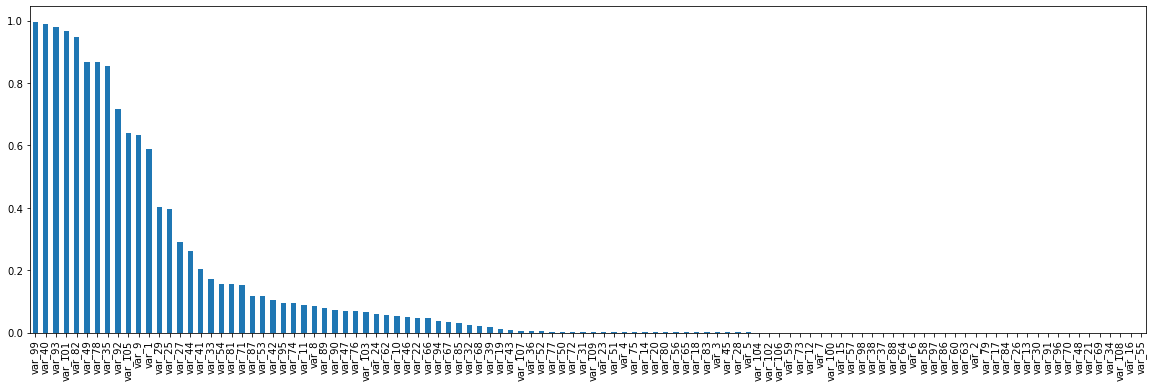

In [65]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6))

In [66]:
# select the top 10 features
sel_ = SelectKBest(f_classif, k=10).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

Index(['var_16', 'var_21', 'var_34', 'var_48', 'var_55', 'var_69', 'var_70',
       'var_91', 'var_96', 'var_108'],
      dtype='object')

In [67]:
# remove unwanted features from the dataset
X_train = sel_.transform(X_train)

X_train.shape

(35000, 10)

## Univariate roc-auc or mse

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [4]:
# load dataset
data = pd.read_csv('datasets/dataset_2.csv')
data.shape

(50000, 109)

In [5]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [6]:
# determine roc-auc for each feature

# here we store the roc-auc values
roc_values = []

# iterate over each feature in the dataset
for feature in X_train.columns:

    # train a decision tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)

    # obtain the predictions
    y_scored = clf.predict_proba(X_test[feature].to_frame())

    # calculate and store the roc-auc
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
# display the result
roc_values[0:10]

[0.5069248231292061,
 0.5006908738145861,
 0.4931445654646017,
 0.5039101753068067,
 0.5014351366034588,
 0.5028347252717772,
 0.5095234564543892,
 0.5062626193645395,
 0.4913455716601861,
 0.5066196352647712]

Text(0, 0.5, 'roc-auc')

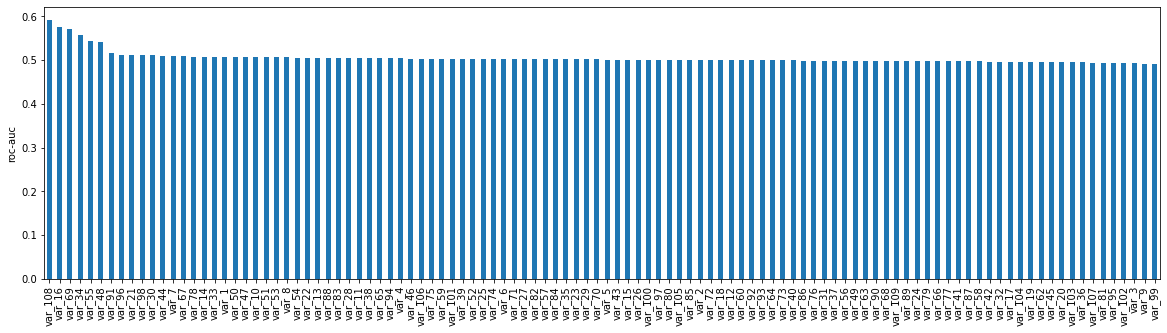

In [7]:
# now let's:

# 1) capture the roc-auc values in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on the roc-auc
# 4) and make a var plot

roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('roc-auc')

In [8]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random

len(roc_values[roc_values > 0.5])

67

In [9]:
selected_features = roc_values[roc_values > 0.5].index

selected_features

Index(['var_1', 'var_2', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_10',
       'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_18',
       'var_21', 'var_22', 'var_23', 'var_25', 'var_26', 'var_27', 'var_28',
       'var_29', 'var_30', 'var_33', 'var_34', 'var_35', 'var_38', 'var_39',
       'var_43', 'var_44', 'var_46', 'var_47', 'var_48', 'var_50', 'var_51',
       'var_52', 'var_53', 'var_54', 'var_55', 'var_57', 'var_59', 'var_65',
       'var_67', 'var_69', 'var_70', 'var_71', 'var_72', 'var_74', 'var_75',
       'var_78', 'var_80', 'var_82', 'var_83', 'var_84', 'var_85', 'var_88',
       'var_91', 'var_94', 'var_96', 'var_97', 'var_98', 'var_100', 'var_101',
       'var_105', 'var_106', 'var_108'],
      dtype='object')

In [10]:
# select features in the dataframes

X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.shape, X_test.shape

((35000, 67), (15000, 67))

## Target mean encoding

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
# load dataset
data = pd.read_csv('datasets/titanic.csv')
data.shape

(1306, 9)

In [3]:
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,female,29.0000,0,0,211.3375,B5,S
1,1,1,male,0.9167,1,2,151.5500,C22,S
2,1,0,female,2.0000,1,2,151.5500,C22,S
3,1,0,male,30.0000,1,2,151.5500,C22,S
4,1,0,female,25.0000,1,2,151.5500,C22,S


In [4]:
# Variable preprocessing:

# Cabin contains missing data
# I will replace missing data by the string "Missing"

# then I will narrow down the different cabins by selecting only the
# first letter, which represents the deck in which the cabin was located

data['cabin'].fillna('Missing', inplace=True)

# captures first letter of string (the letter of the cabin)
data['cabin'] = data['cabin'].str[0]
data['cabin'].unique()

array(['B', 'C', 'E', 'D', 'A', 'N', 'T', 'F', 'G'], dtype=object)

In [5]:
# separate train and test sets

# I will only use the categorical variables and the target

X_train, X_test, y_train, y_test = train_test_split(
    data[['pclass', 'sex', 'embarked', 'cabin', 'survived']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((914, 5), (392, 5))

In [7]:
# function that determines the target mean per category

def mean_encoding(df_train, df_test, categorical_vars):
    
    # temporary copy of the original dataframes
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    
    # iterate over each variable
    for col in categorical_vars:
        
        # make a dictionary of categories, target-mean pairs
        target_mean_dict = df_train.groupby([col])['survived'].mean().to_dict()
        
        # replace the categories by the mean of the target
        df_train_temp[col] = df_train[col].map(target_mean_dict)
        df_test_temp[col] = df_test[col].map(target_mean_dict)
    
    # drop the target from the daatset
    df_train_temp.drop(['survived'], axis=1, inplace=True)
    df_test_temp.drop(['survived'], axis=1, inplace=True)
    
    # return  remapped datasets
    return df_train_temp, df_test_temp

In [8]:
categorical_vars = ['pclass', 'sex', 'embarked', 'cabin']
X_train_enc, X_test_enc = mean_encoding(X_train, X_test, categorical_vars)
X_train_enc.head()

,pclass,sex,embarked,cabin
840,0.243902,0.199664,0.338534,0.295875
866,0.243902,0.199664,0.338534,0.295875
427,0.416667,0.199664,0.338534,0.295875
478,0.416667,0.199664,0.545946,0.295875
1305,0.243902,0.199664,0.338534,0.295875


In [9]:
X_test_enc.head()

,pclass,sex,embarked,cabin
609,0.243902,0.199664,0.338534,0.295875
412,0.416667,0.199664,0.338534,0.295875
528,0.416667,0.199664,0.338534,0.295875
1147,0.243902,0.716981,0.329545,0.295875
942,0.243902,0.199664,0.338534,0.295875


In [12]:
# now, we calculate a roc-auc value, using the encoded variables
# as predictions

roc_values = []

for feature in categorical_vars:
    roc_values.append(roc_auc_score(y_test, X_test_enc[feature]))

In [13]:
# I make a series for easy visualisation

m1 = pd.Series(roc_values)
m1.index = categorical_vars
m1.sort_values(ascending=False)

sex         0.784164
pclass      0.630389
cabin       0.610934
embarked    0.573342
dtype: float64

In [14]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare', 'survived']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((914, 3), (392, 3))

In [15]:
# fill missing values

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [16]:
# Let's divide Age in 10 bins. We use the qcut (quantile cut)
# function from pandas indicating that 11 cutting points (q),
# thus 10 bins.

# retbins= True indicates that I want to capture the limits of
# each interval (so I can then use them to cut the test set)

X_train['age_binned'], intervals = pd.qcut(
    X_train['age'],
    q = 5,
    labels=False,
    retbins=True,
    precision=3,
    duplicates='drop',
)

X_train[['age_binned', 'age']].head(10)

,age_binned,age
840,2,29.813199
866,4,43.000000
427,4,44.000000
478,1,25.000000
1305,1,29.000000
453,4,63.000000
117,3,30.000000
482,3,34.000000
294,3,39.000000
261,4,50.000000


In [17]:
# count the number of distinct bins

X_train['age_binned'].nunique()

5

In [18]:
# display the bins

X_train['age_binned'].unique()

array([2, 4, 1, 3, 0])

In [19]:
# now I use the interval limits calculated in the previous cell to
# bin the testing set

X_test['age_binned'] = pd.cut(x = X_test['age'], bins=intervals, labels=False)

X_test[['age_binned', 'age']].head(10)

,age_binned,age
609,0.0,0.833300
412,3.0,34.000000
528,0.0,19.000000
1147,2.0,29.813199
942,2.0,29.813199
870,2.0,29.813199
5,4.0,48.000000
231,4.0,47.000000
731,0.0,9.000000
1289,2.0,29.813199


In [20]:
# train
X_train['fare_binned'], intervals = pd.qcut(
    X_train['fare'],
    q=5,
    labels=False,
    retbins=True,
    precision=3,
    duplicates='drop',
)

# test
X_test['fare_binned'] = pd.cut(x = X_test['fare'], bins=intervals, labels=False)

In [21]:
X_test['fare_binned'].nunique()

5

In [22]:
X_test.isnull().sum()

age            0
fare           0
survived       0
age_binned     2
fare_binned    5
dtype: int64

In [23]:
# test shows some missing data. These appear when the Fare values can't
# fill missing values

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [24]:
# now we use our previous function to encode the variables
# with the target mean

binned_vars = ['age_binned', 'fare_binned']

X_train_enc, X_test_enc = mean_encoding(
    X_train[binned_vars+['survived']], X_test[binned_vars+['survived']], binned_vars)

X_train_enc.head()

,age_binned,fare_binned
840,0.254237,0.367232
866,0.421965,0.256831
427,0.421965,0.367232
478,0.379487,0.629834
1305,0.379487,0.207447


In [25]:
# now, we calculate a roc-auc value, using the encoded variables
# as predictions

roc_values = []
for feature in binned_vars:
    roc_values.append(roc_auc_score(y_test, X_test_enc[feature]))

In [26]:
# I make a series for easy visualisation

m1 = pd.Series(roc_values)
m1.index = binned_vars
m1.sort_values(ascending=False)

fare_binned    0.666964
age_binned     0.497335
dtype: float64

## Step forward feature selection

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [2]:
# load dataset
data = pd.read_csv('datasets/dataset_2.csv')
data.shape

(50000, 109)

In [3]:
# separate train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [4]:
# remove correlated features to reduce the feature space

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  36


In [5]:
# remove correlated features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 72), (15000, 72))

In [6]:
# within the SFS we indicate:

# 1) the algorithm we want to create, in this case RandomForests
# (note that I use few trees to speed things up)

# 2) the stopping criteria: want to select 10 features 

# 3) wheter to perform step forward or step backward

# 4) the evaluation metric: in this case the roc_auc
# 5) the cross-validation

# this is going to take a while, do not despair

sfs = SFS(RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=0), 
           k_features=10, # the more features we want, the longer it will take to run
           forward=True, 
           floating=False, # see the docs for more details in this parameter
           verbose=2, # this indicates how much to print out intermediate steps
           scoring='roc_auc',
           cv=2)

sfs = sfs.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   22.8s finished

[2020-11-02 07:40:09] Features: 1/10 -- score: 0.576816743026821[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:   18.8s finished

[2020-11-02 07:40:28] Features: 2/10 -- score: 0.5886873005393484[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   12.9s finished

[2020-11-02 07:40:41] Features: 3/10 -- score: 0.5968615155864854[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [7]:
selected_feat = X_train.columns[list(sfs.k_feature_idx_)]
selected_feat

Index(['var_16', 'var_41', 'var_45', 'var_55', 'var_62', 'var_69', 'var_78',
       'var_91', 'var_98', 'var_103'],
      dtype='object')

In [8]:
def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [9]:
# evaluate performance of algorithm built
# using selected features

run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.7091645231260754
Test set
Random Forests roc-auc: 0.697368477213042


In [10]:
# and for comparison, we train random forests using
# all features (except the correlated ones, which we removed already)

run_randomForests(X_train,
                  X_test,
                  y_train, y_test)


Train set
Random Forests roc-auc: 0.7119921185820277
Test set
Random Forests roc-auc: 0.6957598691250635


## Backward feature selection

In [11]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [12]:
# load dataset
data = pd.read_csv('datasets/dataset_2.csv')
data.shape

(50000, 109)

In [13]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [14]:
# remove correlated features to reduce the feature space

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  36


In [15]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 72), (15000, 72))

In [16]:
# within the SFS we indicate:

# 1) the algorithm we want to create, in this case RandomForests
# (note that I use few trees to speed things up)

# 2) the stopping criteria: want to select 50 features

# 3) wheter to perform step forward or step backward

# 4) the evaluation metric: in this case the roc_auc
# 5) the want cross-validation

# this is going to take a while, do not despair

sfs = SFS(RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=0),
          k_features=65, # the lower the features we want, the longer this will take
          forward=False,
          floating=False,
          verbose=2,
          scoring='roc_auc',
          cv=2)

sfs = sfs.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  1.8min finished

[2020-11-02 07:47:56] Features: 71/65 -- score: 0.6268872842282114[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:  2.4min finished

[2020-11-02 07:50:20] Features: 70/65 -- score: 0.6307351898704118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  1.4min finished

[2020-11-02 07:51:43] Features: 69/65 -- score: 0.6300809921574941[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [17]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [18]:
selected_feat= X_train.columns[list(sfs.k_feature_idx_)]

selected_feat

Index(['var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8',
       'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16',
       'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_25',
       'var_26', 'var_27', 'var_30', 'var_31', 'var_34', 'var_35', 'var_37',
       'var_40', 'var_41', 'var_45', 'var_47', 'var_48', 'var_49', 'var_50',
       'var_51', 'var_52', 'var_53', 'var_55', 'var_56', 'var_58', 'var_60',
       'var_62', 'var_63', 'var_67', 'var_68', 'var_69', 'var_71', 'var_73',
       'var_77', 'var_78', 'var_79', 'var_81', 'var_82', 'var_83', 'var_86',
       'var_89', 'var_90', 'var_91', 'var_93', 'var_96', 'var_98', 'var_103',
       'var_107'],
      dtype='object')

In [19]:
# evaluate performance of algorithm built
# using selected features

run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.7118554905228884
Test set
Random Forests roc-auc: 0.6960298383148206


In [20]:
# and for comparison, we train random forests using
# all features (except the correlated ones, which we removed already)

run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.7119921185820277
Test set
Random Forests roc-auc: 0.6957598691250635


# Exhaustive search

In [21]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [22]:
# load dataset
data = pd.read_csv('datasets/dataset_2.csv')
data.shape

(50000, 109)

In [23]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [24]:
# remove correlated features to reduce the feature space

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

# note that we reduce the correlation threshold
# to remove more features
corr_features = correlation(X_train, 0.6)
print('correlated features: ', len(set(corr_features)) )

correlated features:  56


In [25]:
# removed correlated features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 52), (15000, 52))

In [26]:
##################################

# in order to shorter search time for the demonstration
# i will ask the algorithm to try all possible 1 and 2
# feature combinations

# if you have access to a multicore or distributed computer
# system you can try more greedy searches

###################################

# within the EFS we indicate:

# 1) the algorithm we want to create, in this case RandomForests
# (note that I use few trees to speed things up)

# 2) the number of minimum features we want our model to have

# 3) the number of maximum features we want our model to have

# with 2 and 3 we regulate the number of possible feature combinations to
# be evaluated by the model.

# 4) the evaluation metric: in this case the roc_auc
# 5) the cross-validation

# this is going to take a while, do not despair

efs = EFS(RandomForestClassifier(n_estimators=5,
                                 n_jobs=4,
                                 random_state=0,
                                 max_depth=2),
          min_features=1,
          max_features=2,
          scoring='roc_auc',
          print_progress=True,
          cv=2)

# search features
efs = efs.fit(np.array(X_train), y_train)

Features: 1378/1378

In [27]:
efs.best_idx_

(13, 34)

In [28]:
selected_feat = X_train.columns[list(efs.best_idx_)]
selected_feat

Index(['var_16', 'var_55'], dtype='object')

In [29]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [30]:
# evaluate performance of classifier using selected features

run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.7035772664841601
Test set
Random Forests roc-auc: 0.6965072903754118


In [31]:
# and for comparison, we train random forests using
# all features (except the correlated ones, which we removed already)

run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.7134043748007022
Test set
Random Forests roc-auc: 0.6983389541346272
